In [1]:
!pip install pyitlib

# Import necessary libraries

In [2]:
import numpy as np
import pandas as pd

# For statistical tests
from scipy import stats

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For text EDA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LinearRegression, LogisticRegression

# For entropy computation
from pyitlib import discrete_random_variable as drv

# For mapping to Google Drive
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Mount to Google Drive

In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load training data

In [4]:
train = pd.read_csv('gdrive/My Drive/BT4012/Week 2/adult.data',header=None, index_col=None,
                    names=['age', 
                           'workclass', 
                           'fnlwgt', 
                           'education', 
                           'education-num', 
                           'marital-status', 
                           'occupation',
                           'relationship', 
                           'race', 
                           'sex', 
                           'capital-gain', 
                           'capital-loss', 
                           'hours-per-week',
                           'native-country', 'income'])

"""
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt:final weight. In other words, this is the number of people the census believes the entry represents
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
"""
numerical_variables = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_variables = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Quantile Statistics

In [5]:
quantile = train[numerical_variables].describe().loc[['min', '25%', '50%', '75%', 'max']].transpose()
quantile.columns = ['min', 'Q1', 'Q2', 'Q3', 'max']
quantile['range'] = quantile['max'] - quantile['min']
quantile['IQR'] = quantile['Q3'] - quantile['Q1']
quantile

,min,Q1,Q2,Q3,max,range,IQR
age,17.0,28.0,37.0,48.0,90.0,73.0,20.0
fnlwgt,12285.0,117827.0,178356.0,237051.0,1484705.0,1472420.0,119224.0
education-num,1.0,9.0,10.0,12.0,16.0,15.0,3.0
capital-gain,0.0,0.0,0.0,0.0,99999.0,99999.0,0.0
capital-loss,0.0,0.0,0.0,0.0,4356.0,4356.0,0.0
hours-per-week,1.0,40.0,40.0,45.0,99.0,98.0,5.0


## Kurtosis and Skewness

Kurtosis:0.009	Skewness: 0.009


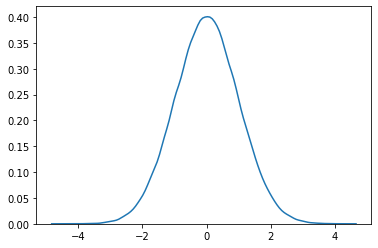

In [6]:
s = np.random.normal(0.0, 1.0, 100000)
data1 = pd.DataFrame({'values': s})
data1['type'] = 'normal'
k1 = round(stats.kurtosis(s), 3)
s1 = round(stats.skew(s), 3)
print (f'Kurtosis:{k1}\tSkewness: {s1}')
sns.kdeplot(s)

Kurtosis: 2.516	Skewness: 1.162


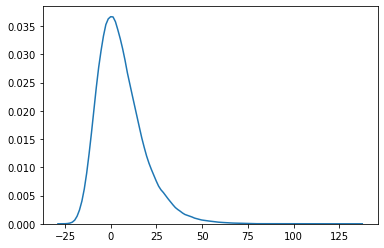

In [7]:
s = np.random.gumbel(0.0, 10.0, 100000)
data2 = pd.DataFrame({'values': s})
data2['type'] = 'gumbel'
k2 = round(stats.kurtosis(s), 3)
s2 = round(stats.skew(s), 3)
print (f'Kurtosis: {k2}\tSkewness: {s2}')
sns.kdeplot(s)

Kurtosis: 0.229	Skewness: 0.453


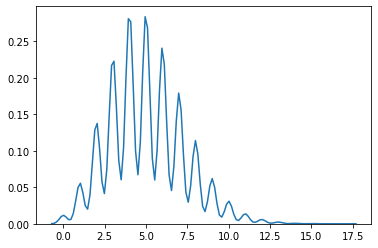

In [8]:
s = np.random.poisson(5.0, 100000)
data3 = pd.DataFrame({'values': s})
data3['type'] = 'poisson'
k3 = round(stats.kurtosis(s), 3)
s3 = round(stats.skew(s), 3)
print (f'Kurtosis: {k3}\tSkewness: {s3}')
sns.kdeplot(s)

data = pd.concat([data1, data2, data3])

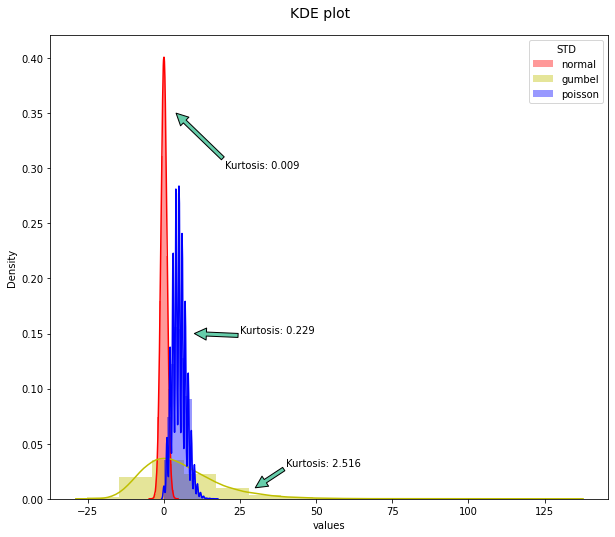

In [9]:
fig = plt.figure(figsize = (10, 8))
title = fig.suptitle("KDE plot", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_ylabel("Density") 

g = sns.FacetGrid(data, hue='type', palette={'normal': "r", 
                                             'gumbel': "y", 
                                             'poisson': 'b'
                                             })
g.map(sns.distplot, 'values', kde=True, bins=15, ax=ax)
ax.legend(title='STD')
ax.annotate(f'Kurtosis: {k1}', 
             xy=(4,.35), 
             xytext=(20, .3),
             arrowprops=dict(facecolor='mediumaquamarine')) 
ax.annotate(f'Kurtosis: {k2}', 
             xy=(30,.01), 
             xytext=(40, .03),
             arrowprops=dict(facecolor='mediumaquamarine')) 
ax.annotate(f'Kurtosis: {k3}', 
             xy=(10,.15), 
             xytext=(25, .15),
             arrowprops=dict(facecolor='mediumaquamarine')) 
plt.close(2)

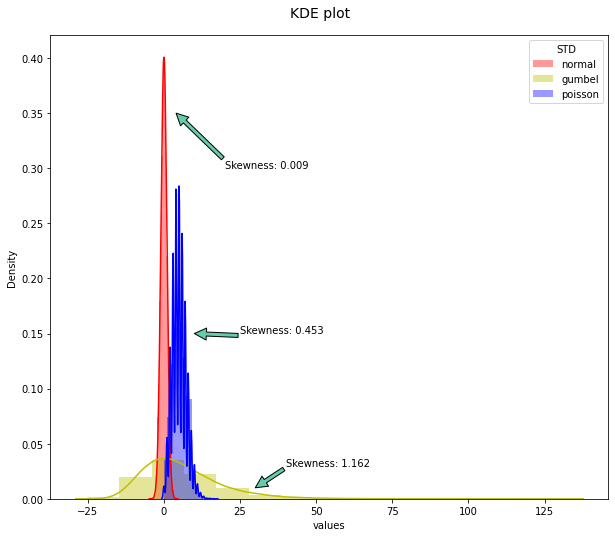

In [10]:
fig = plt.figure(figsize = (10, 8))
title = fig.suptitle("KDE plot", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_ylabel("Density") 

g = sns.FacetGrid(data, hue='type', palette={'normal': "r", 
                                             'gumbel': "y", 
                                             'poisson': 'b'
                                             })
g.map(sns.distplot, 'values', kde=True, bins=15, ax=ax)
ax.legend(title='STD')
ax.annotate(f'Skewness: {s1}', 
             xy=(4,.35), 
             xytext=(20, .3),
             arrowprops=dict(facecolor='mediumaquamarine')) 
ax.annotate(f'Skewness: {s2}', 
             xy=(30,.01), 
             xytext=(40, .03),
             arrowprops=dict(facecolor='mediumaquamarine')) 
ax.annotate(f'Skewness: {s3}', 
             xy=(10,.15), 
             xytext=(25, .15),
             arrowprops=dict(facecolor='mediumaquamarine')) 
plt.close(2)

## Descriptive Statistics

In [11]:
descriptive_stats = train[numerical_variables].describe().loc[['mean', 'std', '50%']].transpose()
descriptive_stats.columns = ['mean', 'std', 'median']
descriptive_stats['mode'] = train[numerical_variables].mode().transpose()[0]
descriptive_stats['mad'] = [stats.median_absolute_deviation(train[x]) for x in numerical_variables]
descriptive_stats['kurtosis'] = [stats.kurtosis(train[x], fisher=False) for x in numerical_variables]
descriptive_stats['excess kurtosis'] = [stats.kurtosis(train[x], fisher=True) for x in numerical_variables]
descriptive_stats['skewness'] = [stats.skew(train[x]) for x in numerical_variables]

descriptive_stats

,mean,std,median,mode,mad,kurtosis,excess kurtosis,skewness
age,38.581647,13.640433,37.0,36.0,14.8260,2.833714,-0.166286,0.558718
fnlwgt,189778.366512,105549.977697,178356.0,123011.0,88798.8444,9.217672,6.217672,1.446913
education-num,10.080679,2.572720,10.0,9.0,1.4826,3.623164,0.623164,-0.311662
capital-gain,1077.648844,7385.292085,0.0,0.0,0.0000,157.775484,154.775484,11.953297
capital-loss,87.303830,402.960219,0.0,0.0,0.0000,23.373489,20.373489,4.594417
hours-per-week,40.437456,12.347429,40.0,40.0,4.4478,5.916055,2.916055,0.227632


mean               38.581647
std                13.640433
median             37.000000
mode               36.000000
mad                14.826000
kurtosis            2.833714
excess kurtosis    -0.166286
skewness            0.558718
Name: age, dtype: float64


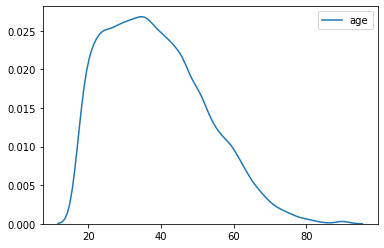

mean               189778.366512
std                105549.977697
median             178356.000000
mode               123011.000000
mad                 88798.844400
kurtosis                9.217672
excess kurtosis         6.217672
skewness                1.446913
Name: fnlwgt, dtype: float64


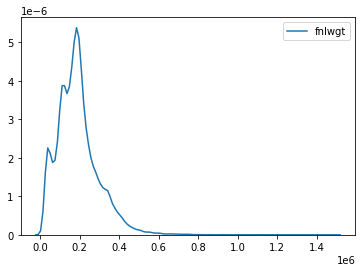

mean               10.080679
std                 2.572720
median             10.000000
mode                9.000000
mad                 1.482600
kurtosis            3.623164
excess kurtosis     0.623164
skewness           -0.311662
Name: education-num, dtype: float64


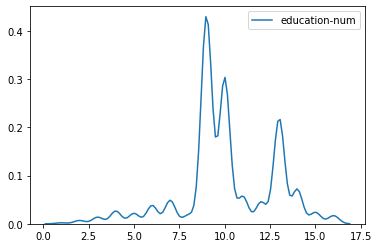

mean               1077.648844
std                7385.292085
median                0.000000
mode                  0.000000
mad                   0.000000
kurtosis            157.775484
excess kurtosis     154.775484
skewness             11.953297
Name: capital-gain, dtype: float64


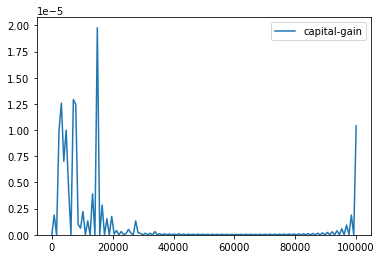

mean                87.303830
std                402.960219
median               0.000000
mode                 0.000000
mad                  0.000000
kurtosis            23.373489
excess kurtosis     20.373489
skewness             4.594417
Name: capital-loss, dtype: float64


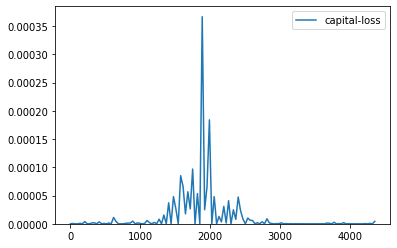

mean               40.437456
std                12.347429
median             40.000000
mode               40.000000
mad                 4.447800
kurtosis            5.916055
excess kurtosis     2.916055
skewness            0.227632
Name: hours-per-week, dtype: float64


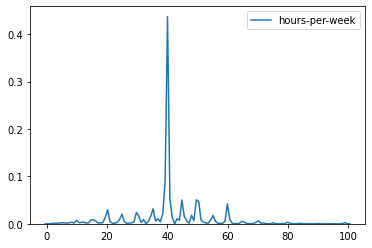

In [12]:
for var in numerical_variables:
  print (descriptive_stats.loc[var])
  sns.kdeplot(train[var])
  plt.show()

## Histogram (for numerical descriptive analysis)

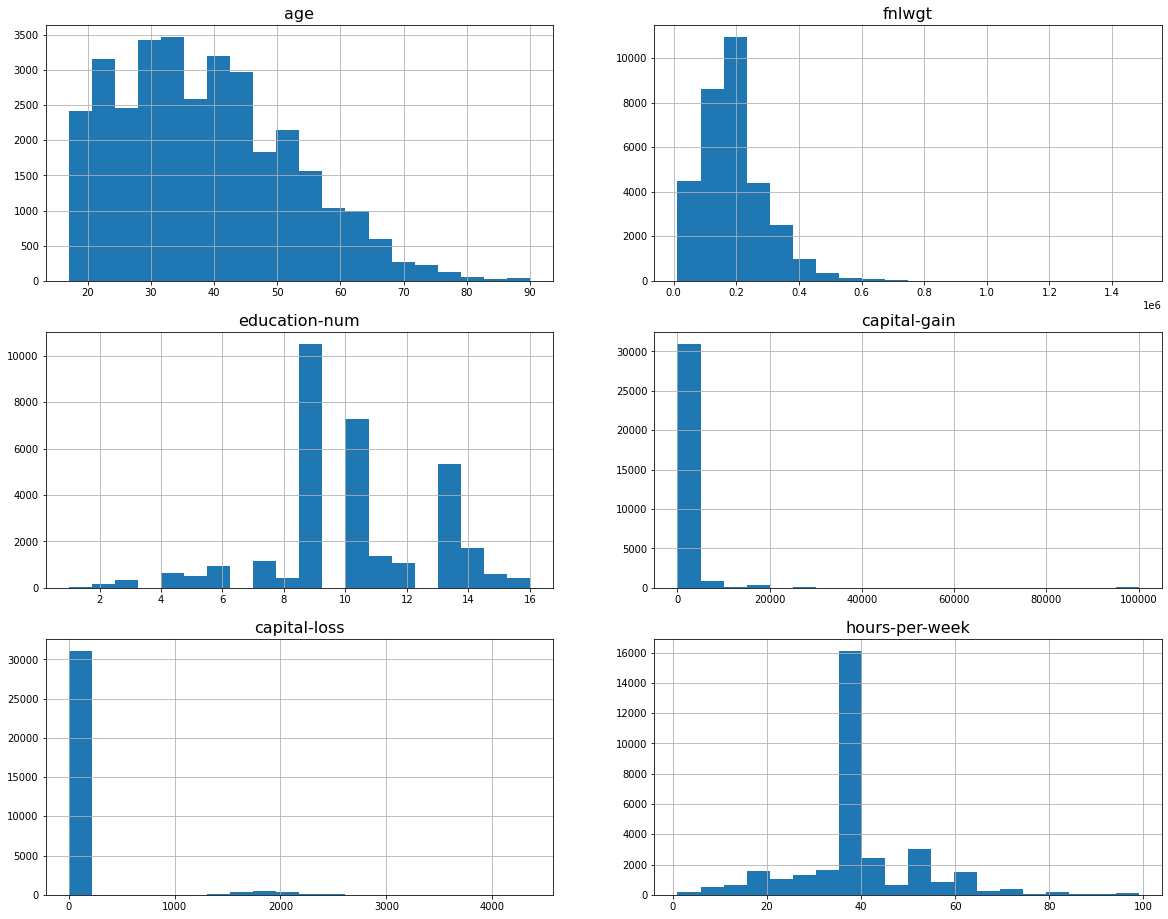

In [13]:
plt.figure(figsize=(20,16))
plt.subplot(321)

axes = [None] * len(numerical_variables)
for index, name in enumerate(train[numerical_variables].columns):
    axes[index] = plt.subplot(3, 2, index+1, label=str(index))
    train[name].hist(ax=axes[index], bins=20)
    axes[index].set_title(name, fontsize=16)

## Cardinality and unique count (for categorical descriptive analysis)

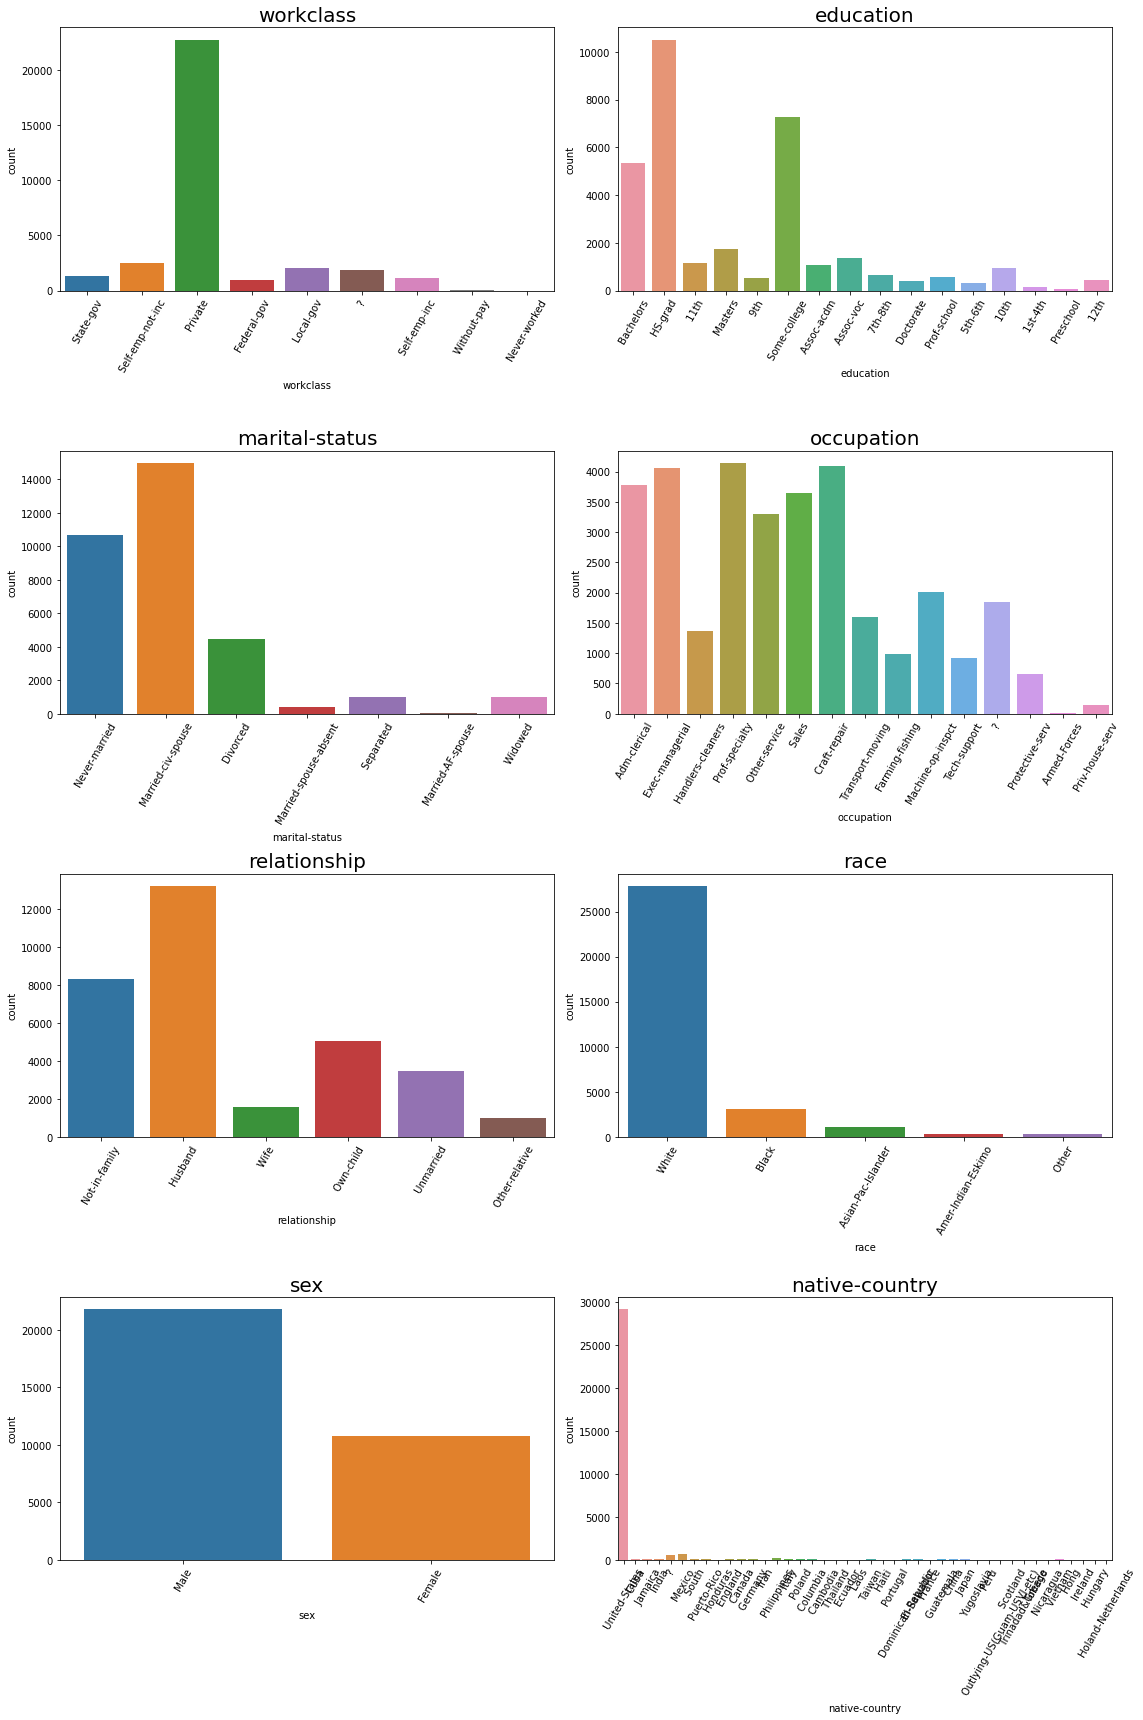

In [14]:
# Set up the matplotlib figure
f, axes = plt.subplots(4, 2, figsize=(16, 24), sharex=False)
# sns.despine(left=True)

for index, name in enumerate(cat_variables):
    sns.countplot(x=name, data=train, ax=axes[index//2,index%2])
    axes[index//2,index%2].set_title(name, fontsize=20)
    axes[index//2,index%2].set_xticklabels(axes[index//2,index%2].get_xticklabels(), rotation=60)
plt.tight_layout()

## EDA for text
### Term frequency
Suppose we have a set of English text documents and wish to rank which document is most relevant to the query, "the brown cow". A simple way to start out is by eliminating documents that do not contain all three words "the", "brown", and "cow", but this still leaves many documents. To further distinguish them, we might count the number of times each term occurs in each document; the number of times a term occurs in a document is called its *term frequency*. 

### Inverse document frequency
Because the term "the" is so common, term frequency will tend to incorrectly emphasize documents which happen to use the word "the" more frequently, without giving enough weight to the more meaningful terms "brown" and "cow". The term "the" is not a good keyword to distinguish relevant and non-relevant documents and terms, unlike the less-common words "brown" and "cow". Hence an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

The formula for inverse document frequency is: 
$$ \text{idf}(t) = \log \frac{1+n}{1+\text{df}(t)} + 1$$ 

Thus, we have:
$$ \text{df}(t) = \exp(\log(n+1)-\text{idf}(t)-1)-1$$ 

In [15]:
text = pd.read_csv('gdrive/My Drive/BT4012/Week 2/answers.csv')
text

,Comment,Outcome,Id
0,combining lindelof's and gregg lind's ideas: l...,1,15086
1,in most cases r is an interpreted language tha...,1,41061
2,"i don't know r at all, but a bit of creative g...",1,34417
3,if you don't want to modify the list in-place ...,1,30549
4,i assume it helps if the matrix is sparse? yes...,1,8496
...,...,...,...
44454,"since python integers are unbounded, you have ...",1,11026
44455,konsta vesterinen's infinity.infinity would wo...,1,27069
44456,use dict.get() which will return the value ass...,1,2117
44457,how does the python 3.6 dictionary implementat...,1,1128


In [16]:
cv = CountVectorizer(stop_words='english', min_df=20, max_df=40000)
cv_tfidf = TfidfVectorizer(stop_words='english', min_df=20, max_df=40000)

In [17]:
word_count = cv.fit_transform(text['Comment'])
word_count_tfidf = cv_tfidf.fit_transform(text['Comment'])

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Word Count')]

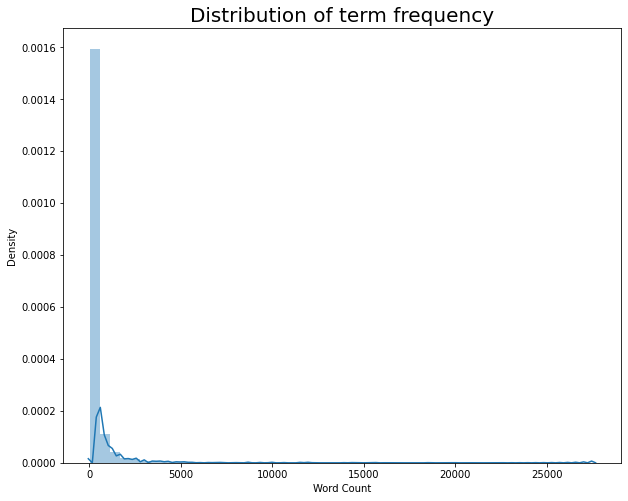

In [18]:
plt.figure(figsize=(10,8))
ax = sns.distplot(word_count.sum(axis=0))
ax.set_title('Distribution of term frequency', fontsize=20)
ax.set(xlabel="Word Count", ylabel = "Density")

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Document frequency')]

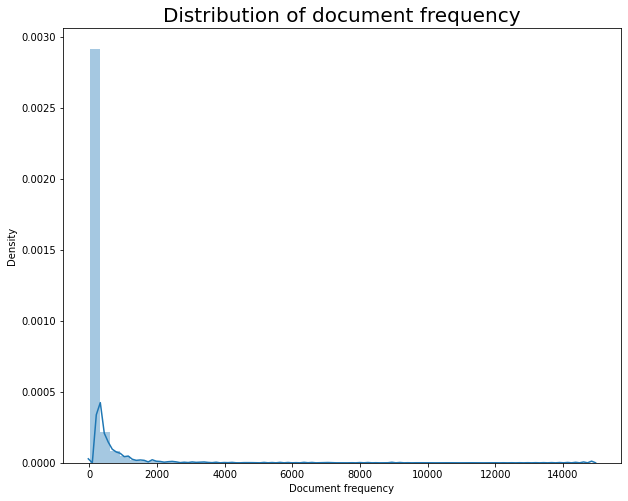

In [19]:
dfs = [np.exp(np.log(1+len(text))-x+1)-1 for x in cv_tfidf.idf_]

plt.figure(figsize=(10,8))
ax = sns.distplot(dfs)
ax.set_title('Distribution of document frequency', fontsize=20)
ax.set(xlabel="Document frequency", ylabel = "Density")

# Correlation Analysis
Correlation Analysis (bivariate analysis) examines the relationship between two attributes, and determines whether the two are correlated. 

## Qualitative Analysis
Qualitative Analysis computes the descriptive statistics of dependent numerical or categorical attributes against each unique value of the independent categorical attribute


### Numerical v.s. Numerical

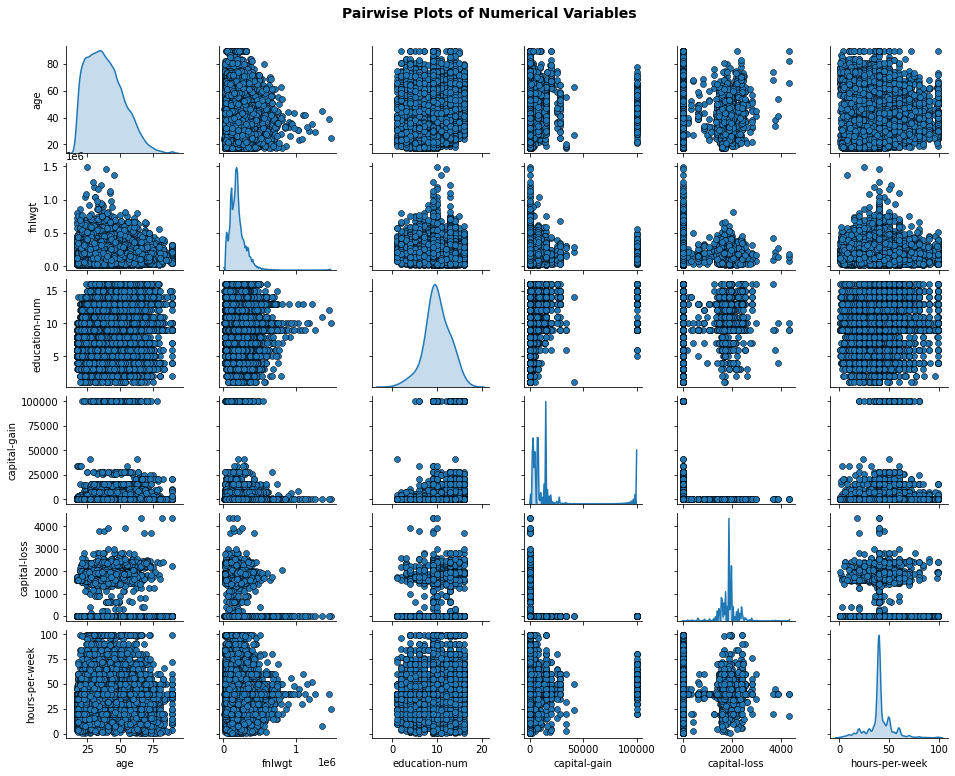

In [20]:
pg = sns.pairplot(train[numerical_variables], 
                  height=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", 
                  diag_kws=dict(shade=True, bw=1.5)
                 )
fig = pg.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots of Numerical Variables', fontsize=14, fontweight='bold')

### Categorical v.s. Categorical

[Text(0, 0, ' State-gov'),
 Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' Private'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Without-pay'),
 Text(0, 0, ' Never-worked')]

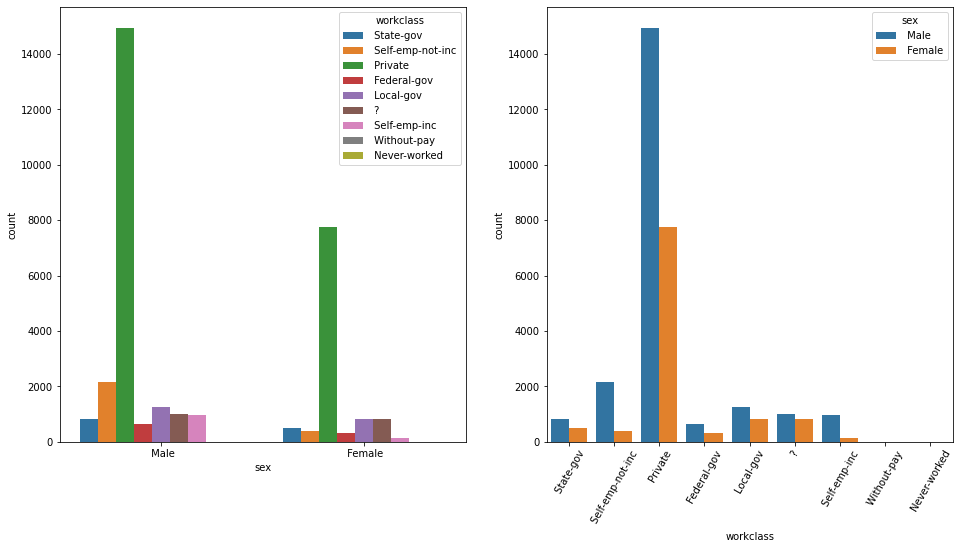

In [21]:
f, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=False)

ax = sns.countplot(x="sex", hue="workclass", data=train, ax=axes[0])
ax = sns.countplot(x="workclass", hue="sex", data=train, ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

### Numerical v.s. Categorical

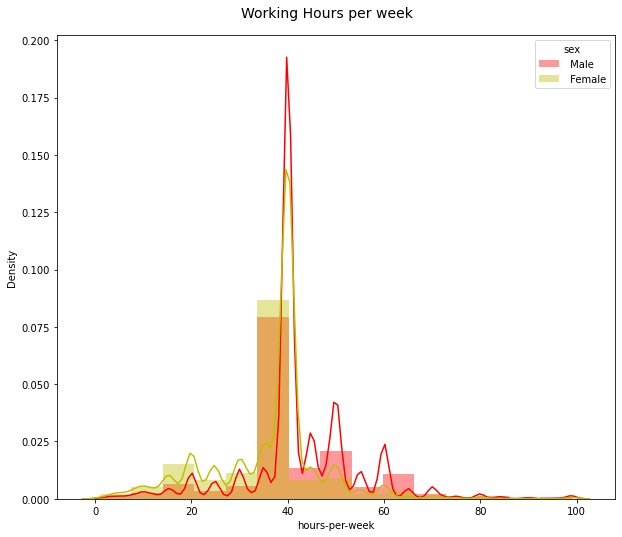

In [22]:
fig = plt.figure(figsize = (10, 8))
title = fig.suptitle("Working Hours per week", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_ylabel("Density") 

g = sns.FacetGrid(train, hue='sex', palette={' Male': "r", 
                                             ' Female': "y"})
g.map(sns.distplot, 'hours-per-week', kde=True, bins=15, ax=ax)
ax.legend(title='sex')
plt.close(2)

## Quantitative Analysis
Quantitative analysis quantifies relationships by generating numerical data or data that can be transformed into usable statistics.


### Numerical v.s. Numerical

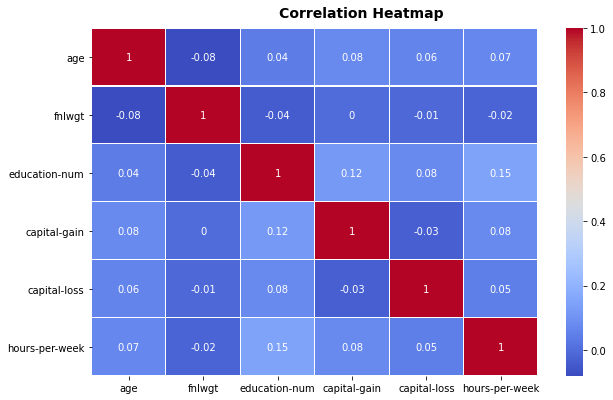

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(train.corr(),2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap', fontsize=14, fontweight='bold')

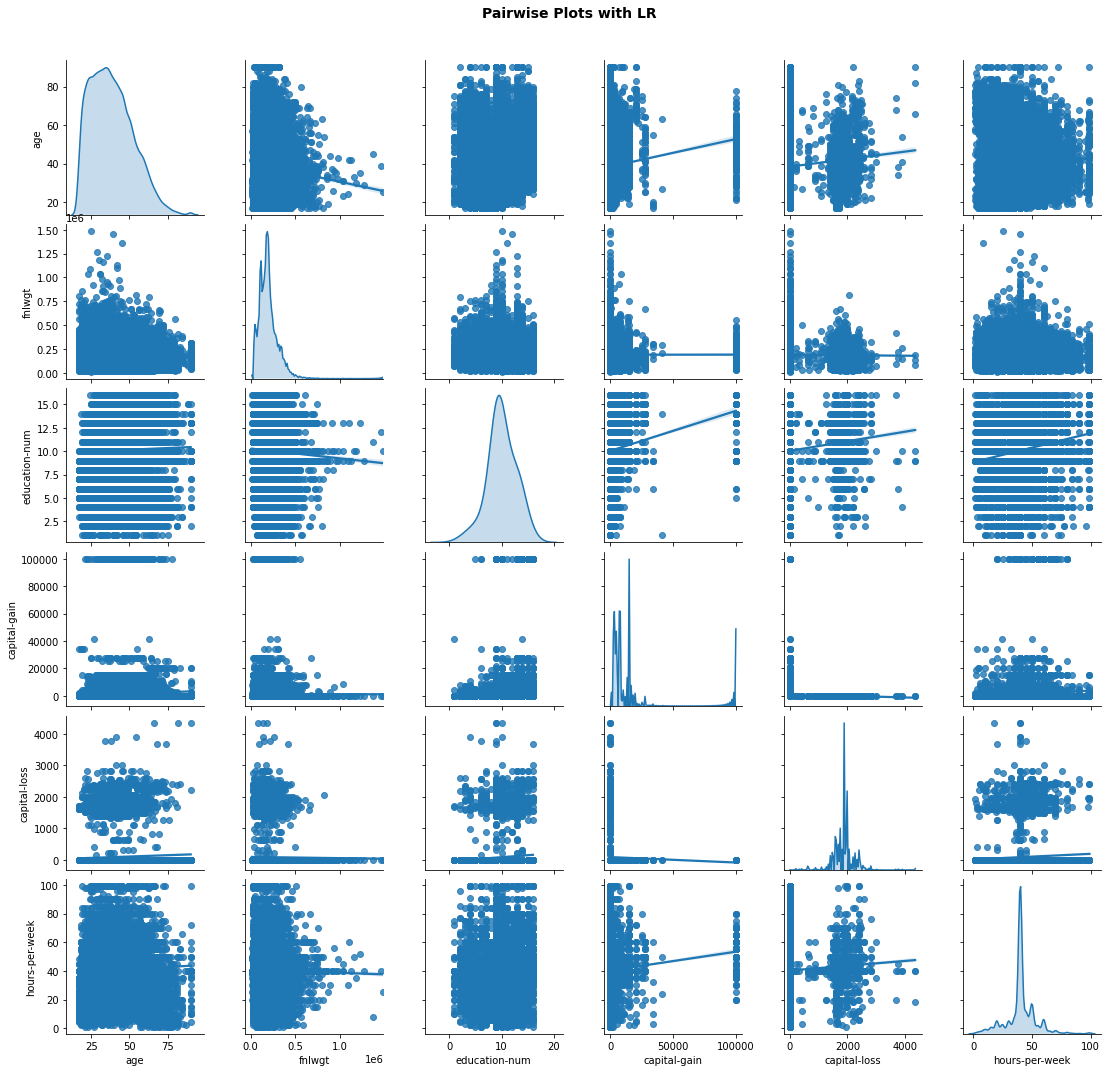

In [24]:
pp = sns.pairplot(train[numerical_variables], 
                  diag_kind="kde", diag_kws=dict(shade=True, bw=1.5),
                  kind="reg") # <-- Fit linear regression models to the scatter plots
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots with LR', fontsize=14, fontweight='bold')

### Categorical v.s. Categorical

#### Chi Square Test
The Chi-Square test is a statistical procedure used to examine the differences between categorical variables in the same population. 

In [25]:
results = []
for cat1 in cat_variables:
    for cat2 in cat_variables:
        if cat1!=cat2:
            crosstab = pd.crosstab(train[cat1], train[cat2])
            _, p_val, _, _ = stats.chi2_contingency(crosstab)
            results.append((cat1, cat2, p_val))
        else:
            results.append((cat1, cat2, None))

chisquare = pd.DataFrame(results, columns=['cat1', 'cat2', 'p-value'])
chisquare.pivot_table(index='cat1', columns='cat2', values='p-value')

cat2,education,marital-status,native-country,occupation,race,relationship,sex,workclass
cat1,,,,,,,,
education,NaN,1.170673e-282,0.000000e+00,0.000000e+00,5.547320e-116,0.000000e+00,1.667778e-54,0.000000e+00
marital-status,1.170673e-282,NaN,1.325643e-98,0.000000e+00,1.308734e-179,0.000000e+00,0.000000e+00,1.531122e-264
native-country,0.000000e+00,1.325643e-98,NaN,3.056006e-227,0.000000e+00,1.722806e-137,7.950883e-14,3.651064e-13
occupation,0.000000e+00,0.000000e+00,3.056006e-227,NaN,1.609041e-142,0.000000e+00,0.000000e+00,0.000000e+00
race,5.547320e-116,1.308734e-179,0.000000e+00,1.609041e-142,NaN,2.825570e-253,5.192061e-97,1.125688e-67
relationship,0.000000e+00,0.000000e+00,1.722806e-137,0.000000e+00,2.825570e-253,NaN,0.000000e+00,3.445700e-307
sex,1.667778e-54,0.000000e+00,7.950883e-14,0.000000e+00,5.192061e-97,0.000000e+00,NaN,1.028604e-160
workclass,0.000000e+00,1.531122e-264,3.651064e-13,0.000000e+00,1.125688e-67,3.445700e-307,1.028604e-160,NaN


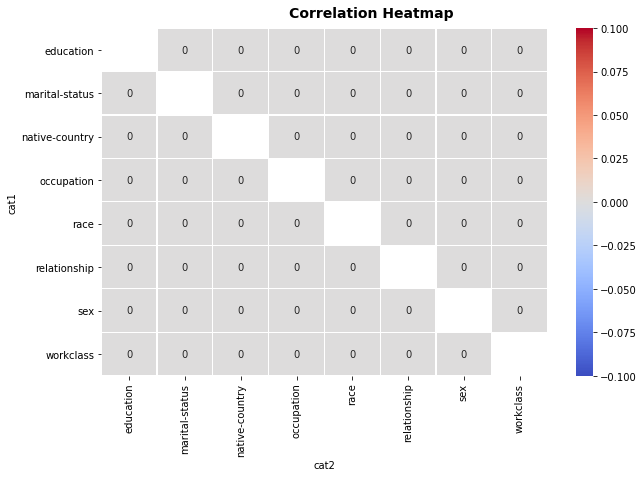

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(chisquare.pivot_table(index='cat1', columns='cat2', values='p-value'),2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap', fontsize=14, fontweight='bold')

#### Information Gain
Information Gain measures the reduction in entropy or surprise by splitting a dataset according to a given value of a random variable.

A larger information gain suggests a lower entropy group or groups of samples, and hence less surprise.

In [27]:
# Compute Entropy
entropies = pd.DataFrame([(x, drv.entropy(train[x])) for x in cat_variables], columns=['cat1', 'H(cat1)'])

# Compute Conditional Entropy
results = []
for cat1 in cat_variables:
    for cat2 in cat_variables:
        if cat1!=cat2:
            results.append((cat1, cat2, drv.entropy_conditional(train[cat1], train[cat2])))

conditional_entropy = pd.DataFrame(results, columns=['cat1', 'cat2', 'H(cat1|cat2)'])

information_gain = entropies.merge(conditional_entropy)
information_gain['information gain'] = information_gain['H(cat1)'] - information_gain['H(cat1|cat2)']

information_gain

,cat1,H(cat1),cat2,H(cat1|cat2),information gain
0,workclass,1.647976927509927,education,1.6008360386933624,0.0471409
1,workclass,1.647976927509927,marital-status,1.616642904869686,0.031334
2,workclass,1.647976927509927,occupation,1.1767748074652773,0.471202
3,workclass,1.647976927509927,relationship,1.6126926615128854,0.0352843
4,workclass,1.647976927509927,race,1.6378694514972594,0.0101075
5,workclass,1.647976927509927,sex,1.62914375371545,0.0188332
6,workclass,1.647976927509927,native-country,1.634488871889739,0.0134881
7,education,2.9313508978037115,workclass,2.884210008987146,0.0471409
8,education,2.9313508978037115,marital-status,2.896844075295689,0.0345068
9,education,2.9313508978037115,occupation,2.6086736039962903,0.322677


### Categorical v.s. Numerical

#### Student T-test
The T-test is any statistical hypothesis test in which the test statistic follows a student's t-distribution under the null hypothesis. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [28]:
results = []

for attribute in numerical_variables:
    _, p_value = stats.ttest_ind(train[train.income == ' <=50K'][attribute], train[train.income == ' >50K'][attribute])
    results.append((attribute, p_value))

In [29]:
student_t = pd.DataFrame(results, columns=['Numerical', 'P-value'])
student_t['Categorical'] = 'income'
student_t['Value1'] = ' <=50K'
student_t['Value2'] = '>=50K'
student_t = student_t[['Categorical', 'Value1', 'Value2', 'Numerical', 'P-value']]
student_t

,Categorical,Value1,Value2,Numerical,P-value
0,income,<=50K,>=50K,age,0.000000e+00
1,income,<=50K,>=50K,fnlwgt,8.773666e-02
2,income,<=50K,>=50K,education-num,0.000000e+00
3,income,<=50K,>=50K,capital-gain,0.000000e+00
4,income,<=50K,>=50K,capital-loss,2.686547e-164
5,income,<=50K,>=50K,hours-per-week,0.000000e+00


#### ANOVA
ANOVA determines whether three or more populations are statistically different from each other.


In [30]:
cat = 'income'
num = 'fnlwgt'
results = []

for cat in cat_variables + ['income']:
    for num in numerical_variables:
        
        candidates = []
        for val in train[cat].unique():
            if len(train[train[cat]==val][num])>0:
                candidates.append(train[train[cat]==val][num])
        _, p_val = stats.f_oneway(*candidates)
        results.append((cat, num, p_val))

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3349: RuntimeWarning: divide by zero encountered in double_scalars
  f = msb / msw


In [31]:
Anova = pd.DataFrame(results, columns=['Numerical', 'Categorical', 'P-value'])
Anova.pivot_table(index='Numerical', columns='Categorical')

P-value                 ...                              
Categorical               age   capital-gain  ...         fnlwgt hours-per-week
Numerical                                     ...                              
education        0.000000e+00  4.979215e-268  ...   9.768767e-24  8.672506e-258
income           0.000000e+00   0.000000e+00  ...   8.773666e-02   0.000000e+00
marital-status   0.000000e+00   8.447332e-51  ...   1.340805e-18   0.000000e+00
native-country   1.019045e-32   4.549248e-01  ...  1.848558e-147   5.752477e-04
occupation      3.521003e-237   3.896169e-91  ...   5.050785e-15   0.000000e+00
race             1.147828e-12   1.321675e-03  ...  4.464415e-139   3.367985e-20
relationship     0.000000e+00   1.087599e-55  ...   1.277617e-08   0.000000e+00
sex              4.823993e-58   2.081209e-18  ...   1.252584e-06   0.000000e+00
workclass        0.000000e+00   5.052781e-72  ...   4.108171e-16   0.000000e+00

[9 rows x 6 columns]

#### Logistic Regression


In [32]:
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(train[numerical_variables], train['income'])
feature_importance = pd.DataFrame({'feature': numerical_variables, 'weight': clf_lr.coef_.squeeze()})
feature_importance

,feature,weight
0,age,-0.000028
1,fnlwgt,-0.000007
2,education-num,-0.000006
3,capital-gain,0.000321
4,capital-loss,0.000701
5,hours-per-week,-0.000031


### Outlier Detection
Outliers are extreme observations that are very dissimilar to the rest of the population. 


#### Univariate 
##### Box plot

Text(0, 0.5, 'Age')

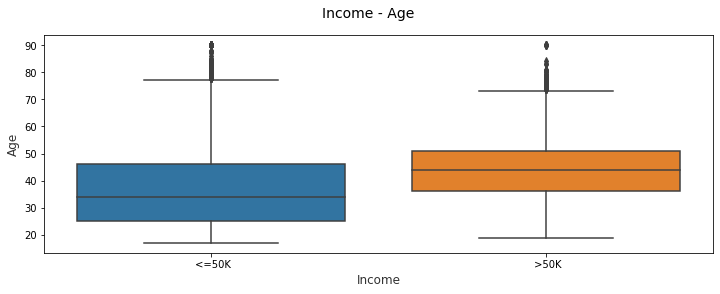

In [33]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Income - Age', fontsize=14)

sns.boxplot(x="income", y="age", data=train,  ax=ax)
ax.set_xlabel("Income",size = 12,alpha=0.8)
ax.set_ylabel("Age",size = 12,alpha=0.8)

#### Z-score distribution

Text(0, 0.5, 'Density')

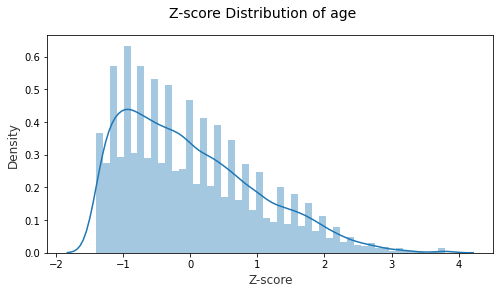

In [34]:
subset = train[train['income'] == ' <=50K'][['age']]
mean, std = subset.describe()['age']['mean'], subset.describe()['age']['std']
subset['z-score'] = (subset['age'] - mean) / std

f, ax = plt.subplots(1, 1, figsize=(8, 4))
f.suptitle('Z-score Distribution of age', fontsize=14)
sns.distplot(subset['z-score'])
ax.set_xlabel("Z-score",size=12,alpha=0.8)
ax.set_ylabel("Density",size=12,alpha=0.8)

In [35]:
subset[(subset['z-score']>3) ]

,age,z-score
74,79,3.011127
222,90,3.795715
430,80,3.082453
918,81,3.153779
1040,90,3.795715
...,...,...
32277,90,3.795715
32367,90,3.795715
32459,85,3.439084
32494,82,3.225105


#### Multivariate
Fitting linear models and inspecting the observations with large errors.

In [36]:
lr = LinearRegression()

# model training
lr.fit(train[['capital-gain']], train['age'])

# use the trained model to do predictions
train_capital_gain_age = train[['capital-gain', 'age']].copy()
train_capital_gain_age['predicted age'] = lr.predict(train_capital_gain_age[['capital-gain']])

# compute the absolute errors
train_capital_gain_age['error'] = abs(train_capital_gain_age['age'] - train_capital_gain_age['predicted age'])
train_capital_gain_age[train_capital_gain_age['capital-gain']>0].sample(100).sort_values(by='error', ascending=False)[:10]

,capital-gain,age,predicted age,error
14689,6723,72,39.391544,32.608456
10615,1424,69,38.631335,30.368665
30191,3273,69,38.896598,30.103402
21657,9386,69,39.773585,29.226415
30363,9386,69,39.773585,29.226415
25481,10605,68,39.948466,28.051534
1036,1409,66,38.629183,27.370817
26038,5556,65,39.224123,25.775877
6035,99999,78,52.773168,25.226832
28232,2635,64,38.805069,25.194931
